In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
loan_dataset = pd.read_csv('https://raw.githubusercontent.com/shrikant-temburwar/Loan-Prediction-Dataset/master/train.csv')

In [3]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan_dataset.shape

(614, 13)

In [5]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
loan_dataset = loan_dataset.dropna()

In [8]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [49]:
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [50]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,0,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,0,0,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,0,0,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,0,1,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,0,0,2,0,1,5417,4196.0,267.0,360.0,1.0,Urban,1


<Axes: xlabel='Education', ylabel='count'>

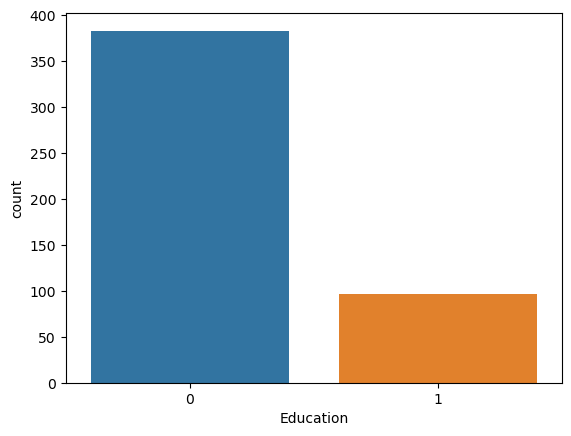

In [51]:
sns.countplot(x='Education',data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

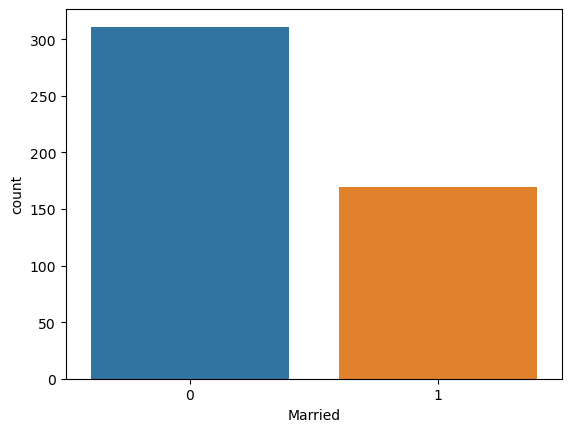

In [52]:
sns.countplot(x='Married',data=loan_dataset)

<Axes: xlabel='Gender', ylabel='count'>

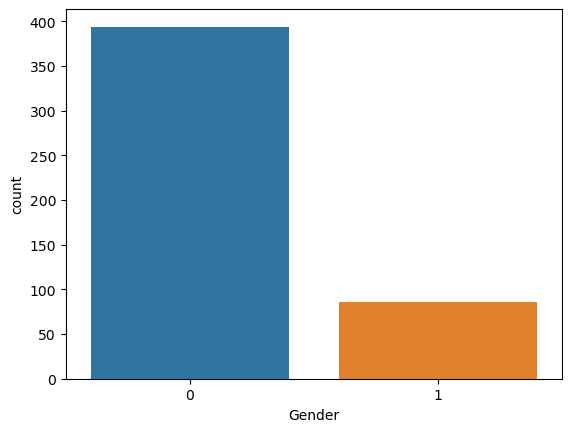

In [53]:
sns.countplot(x='Gender',data=loan_dataset)

In [54]:
loan_dataset['Gender'].value_counts()

Gender
0    394
1     86
Name: count, dtype: int64

In [55]:
loan_dataset.replace({"Gender":{'Male':0,'Female':1}},inplace=True)

In [56]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,0,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,0,0,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,0,0,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,0,1,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,0,0,2,0,1,5417,4196.0,267.0,360.0,1.0,Urban,1


In [57]:
loan_dataset.replace({"Married":{'Yes':0,'No':1}},inplace=True)

In [58]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,0,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,0,0,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,0,0,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,0,1,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,0,0,2,0,1,5417,4196.0,267.0,360.0,1.0,Urban,1


In [59]:
loan_dataset['Education'].value_counts()

Education
0    383
1     97
Name: count, dtype: int64

In [60]:
loan_dataset.replace({"Education":{'Graduate':0,'Not Graduate':1}},inplace=True)

In [61]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,0,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,0,0,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,0,0,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,0,1,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,0,0,2,0,1,5417,4196.0,267.0,360.0,1.0,Urban,1


In [62]:
loan_dataset['Self_Employed'].value_counts()

Self_Employed
0    414
1     66
Name: count, dtype: int64

In [63]:
loan_dataset.replace({"Self_Employed":{'No':0,'Yes':1}},inplace=True)

In [64]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,0,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,0,0,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,0,0,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,0,1,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,0,0,2,0,1,5417,4196.0,267.0,360.0,1.0,Urban,1


In [65]:
loan_dataset['Property_Area'].value_counts()

Property_Area
Semiurban    191
Urban        150
Rural        139
Name: count, dtype: int64

In [66]:
loan_dataset.replace({"Property_Area":{'Semiurban':0,'Urban':1,'Rural':2}},inplace=True)

In [67]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,0,1,0,0,4583,1508.0,128.0,360.0,1.0,2,0
2,LP001005,0,0,0,0,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,0,0,0,1,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,0,1,0,0,0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,0,0,2,0,1,5417,4196.0,267.0,360.0,1.0,1,1


In [68]:
loan_dataset['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [69]:
loan_dataset = loan_dataset.replace(to_replace='3+',value=4)

In [70]:
loan_dataset['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

In [73]:
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [74]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         0        0          1          0              0             4583   
2         0        0          0          0              1             3000   
3         0        0          0          1              0             2583   
4         0        1          0          0              0             6000   
5         0        0          2          0              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       1        1          0          0              0             2900   
610       0        0          4          0              0             4106   
611       0        0          1          0              0             8072   
612       0        0          2          0              0             7583   
613       1        1          0          0              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,stratify=Y, random_state=2)

In [80]:
print(Y.shape, Y_train.shape, Y_test.shape)

(480,) (384,) (96,)


In [81]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (384, 11) (96, 11)


In [82]:
model = svm.SVC(kernel='linear')

In [83]:
model.fit(X_train, Y_train)

SVC(kernel='linear')

In [84]:
X_train_prediction = model.predict(X_train)

data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [85]:
print('Accuracy:', data_accuracy)

Accuracy: 0.7786458333333334


In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
model = RandomForestClassifier()

In [88]:
model.fit(X_train, Y_train)

RandomForestClassifier()

In [91]:
X_test_prediction = model.predict(X_test)

data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [92]:
print('Accuracy:', data_accuracy)

Accuracy: 0.7916666666666666
